In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spg_updated.csv")

Feature Selection:

1.	Solar energy production: The main target variable that you want to predict, such as the amount of solar energy produced in kilowatt-hours (kWh) or megawatt-hours (MWh) per time period.

2.	Solar Zenith Angle: Zenith angle is the angle between the sun and the observer's zenith, or the point directly overhead. This angle can impact the amount of solar radiation that reaches the earth's surface and therefore impact solar energy production. In general, when the sun is closer to the zenith, the solar radiation intensity is higher, resulting in higher energy production.

3.	Angle of incidence: Angle of incidence is the angle between the sun's rays and a surface, such as a solar panel. This angle is measured relative to the surface and impacts the amount of solar energy that is absorbed by the surface.

4.	Relative Humidity (Value taken 2m above the ground): Humidity readily affects the efficiency of the solar cells and creates a minimal layer of water on its surface. It also decreases the efficiency by 10-20% of the total power output produced.

5.	Total Cloud Cover: Clouds can block or reflect incoming solar radiation, reducing the amount of solar radiation that reaches the earth's surface and therefore reducing solar energy production. Therefore, a higher total cloud cover can result in lower solar energy production, while a lower total cloud cover can result in higher solar energy production.

6.	Temperature: While a higher temperature can imply proper sunlight and hence a productive output, the efficiency of solar panels can also decrease as the temperature increases. This is because higher temperatures can cause the electrons in the solar cells to become more excited and move more quickly, which can reduce the efficiency of energy conversion. In addition, higher temperatures can increase the resistance of the conductive material in the solar cells, which can also reduce energy production. 

7.	Shortwave Radiation: Shortwave radiation is the portion of the solar radiation spectrum that includes wavelengths between approximately 0.3 and 4 micrometres. This radiation is absorbed by the earth's surface and can be converted into heat or electricity using solar panels. So, shortwave radiation is an important component of solar radiation and can have a significant impact on solar energy production, making it an important feature to include in a solar energy prediction model.

8.	Mean Sea Level: Mean Sea level can be indirectly related to solar energy production in certain coastal areas, where factors such as tides and coastal currents may impact the availability and reliability of solar energy. In these cases, mean sea level may be a relevant feature to include in the model, as it can help capture the impact of these coastal factors on solar energy production.

9.	Precipitation: Rain can absorb or scatter solar radiation, reducing the amount of radiation that reaches the earth's surface and therefore reducing solar energy production. So, precipitation can have a significant impact on solar energy production and can therefore be an important feature to include in a solar energy prediction model.

10.	 Wind Speed (Taken 10m above ground): Higher wind speeds can increase convective heat loss from solar panels, which can reduce the efficiency of energy conversion and therefore reduce solar energy production. In addition, high wind speeds can also cause physical damage to solar panels, further reducing energy production.
 


In [3]:
print(df.shape)
#(4213,10) implies that our dataset has 4213 values for 10 different parameters.

(4213, 10)


In [4]:
# Import the plotting libraries
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
# Separating the data.  
#First nine columns as X, and last column as Y (Generated Power)
X = df[["temperature_2_m_above_gnd", "relative_humidity_2_m_above_gnd", "mean_sea_level_pressure_MSL", 
        "total_precipitation_sfc",  "total_cloud_cover_sfc", "shortwave_radiation_backwards_sfc",
        "wind_speed_10_m_above_gnd", "angle_of_incidence",
       "zenith"]]
y = df[["generated_power_kw"]]
X.shape, y.shape

((4213, 9), (4213, 1))

In [6]:
# We split the data into train and test sets. 
#We have kept 80% of our data for training and rest 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3370, 9)
(843, 9)
(3370, 1)
(843, 1)


In [8]:
#This gives the correlation of all the parameters in X with that of Y(Generated Power)
#A value close to 1 indicates a higher direct correlation and a value closer to -1 indiactes a higher inverse correlation.
#A value close to 0 indicates a lower correlation i.e., the parameters does not affect our model much.
corr_matrix = df.corr()
corr_matrix['generated_power_kw'].sort_values(ascending=False)

generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
wind_speed_10_m_above_gnd           -0.083043
total_precipitation_sfc             -0.118442
total_cloud_cover_sfc               -0.334338
relative_humidity_2_m_above_gnd     -0.336783
angle_of_incidence                  -0.646537
zenith                              -0.649991
Name: generated_power_kw, dtype: float64

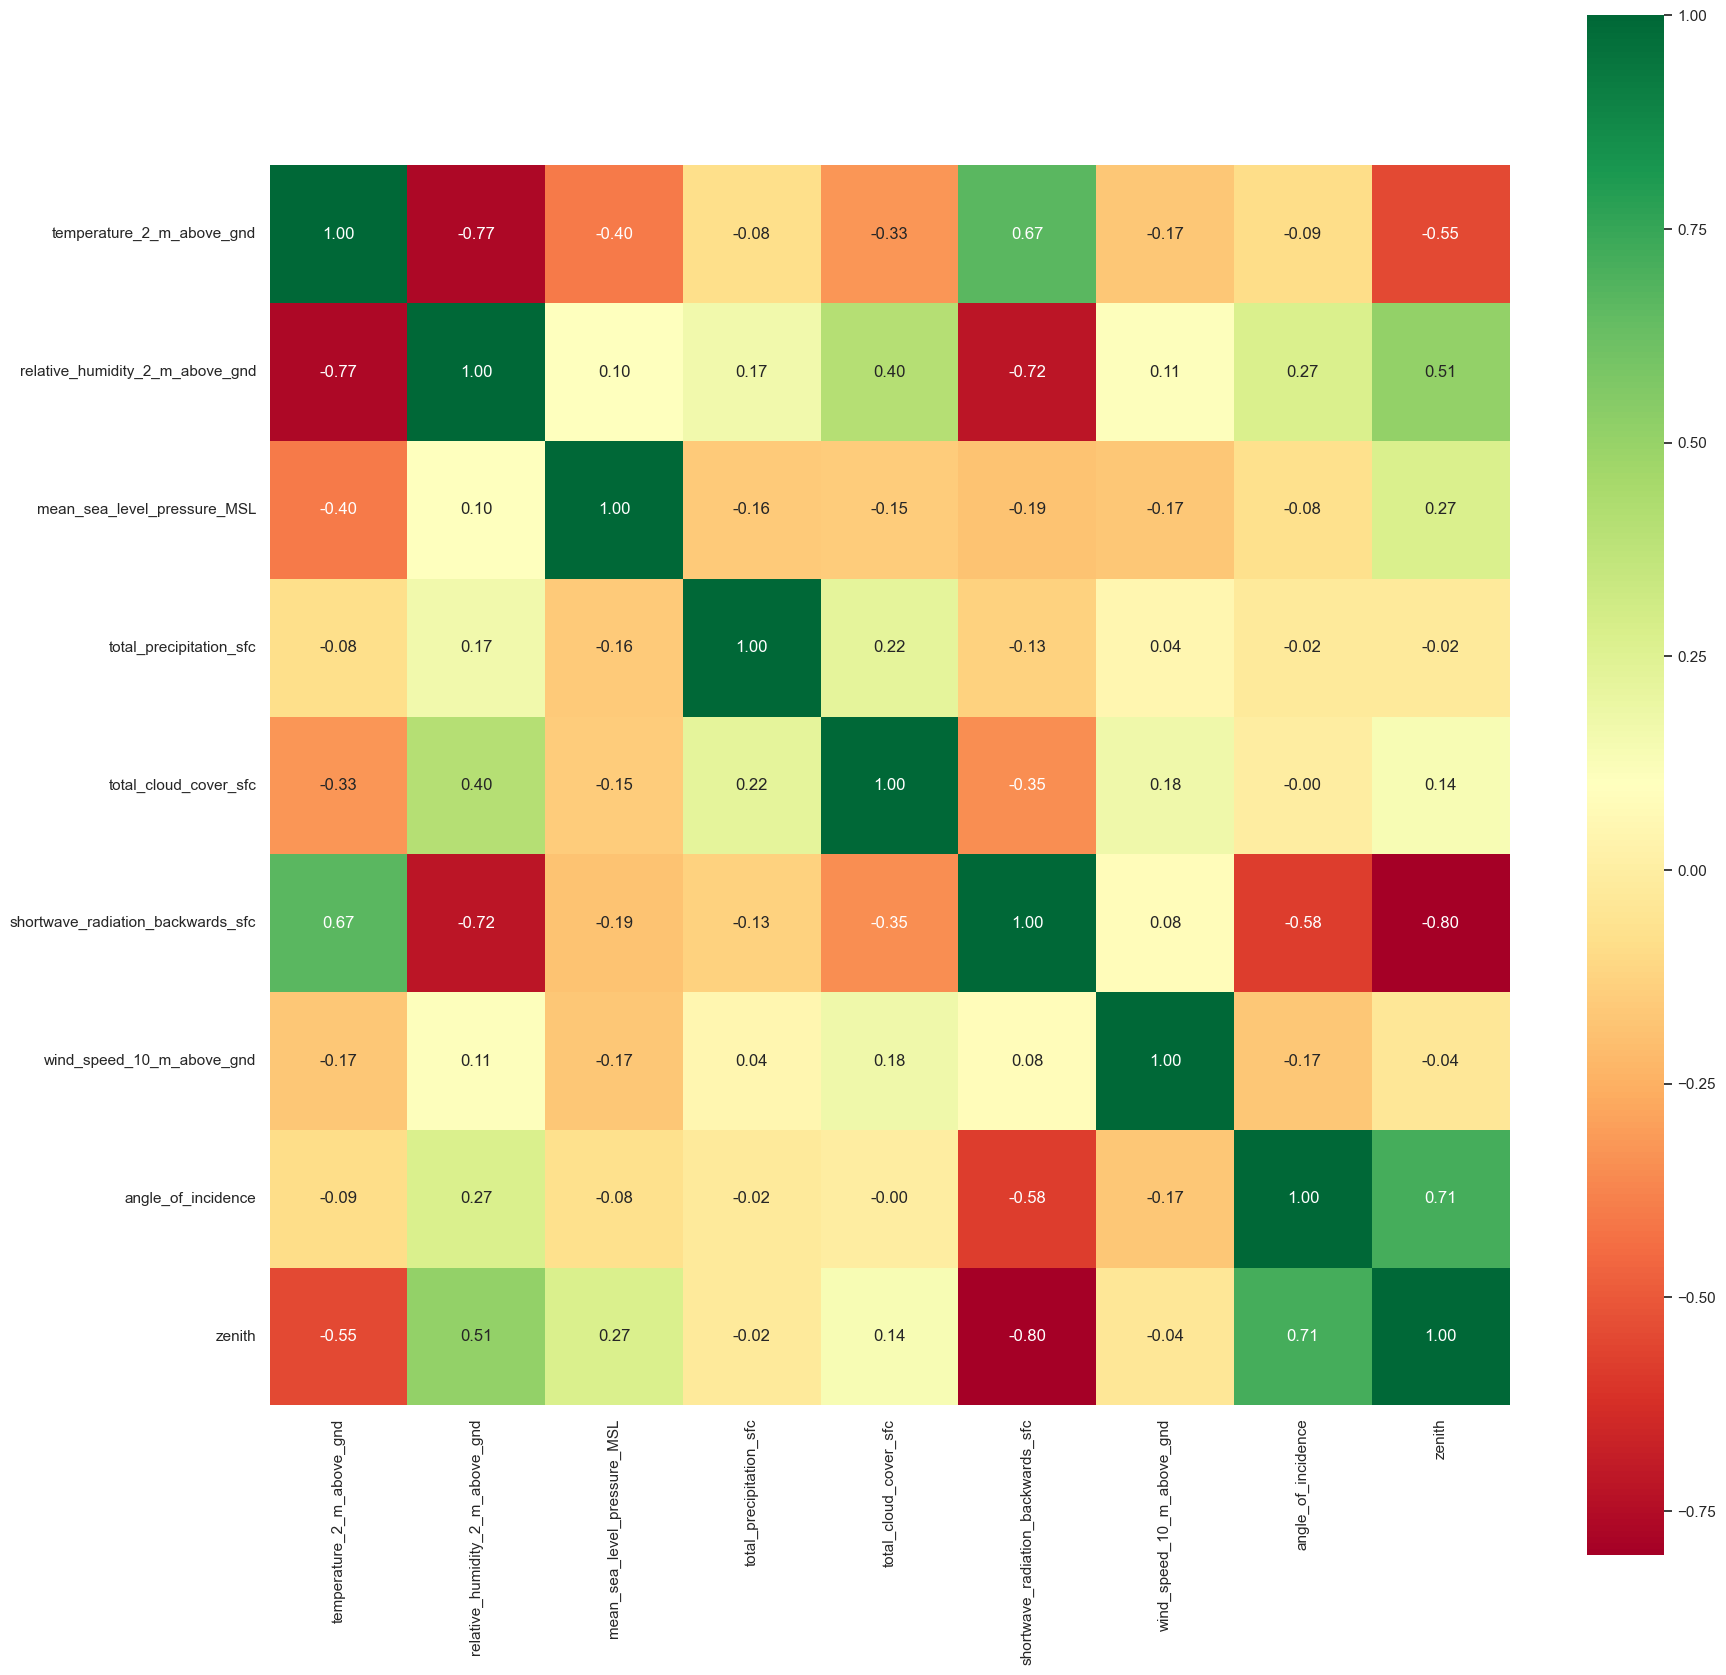

In [9]:
#This will give us the corrrelation of all the parameters with each other and not just with the generated power.
import seaborn as sns
col = ["temperature_2_m_above_gnd", "relative_humidity_2_m_above_gnd", "mean_sea_level_pressure_MSL", 
        "total_precipitation_sfc",  "total_cloud_cover_sfc", "shortwave_radiation_backwards_sfc",
        "wind_speed_10_m_above_gnd", "angle_of_incidence",
       "zenith"]
corr = df[col].corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

RMSE, MSE, and R-squared are commonly used statistical metrics to evaluate the performance of regression models, including solar energy prediction models.

RMSE stands for Root Mean Square Error and represents the average difference between the predicted values and the actual values. It is calculated by taking the square root of the average of the squared differences between the predicted values and the actual values. Lower RMSE values indicate better predictive accuracy, as they indicate a smaller average difference between the predicted and actual values.

MSE stands for Mean Squared Error and represents the average of the squared differences between the predicted values and the actual values. It is calculated by taking the average of the squared differences between the predicted values and the actual values. Like RMSE, lower MSE values indicate better predictive accuracy.

R-squared, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable (i.e., the solar energy production) that is explained by the independent variables (i.e., the features used in the prediction model). R-squared values range from 0 to 1, with higher values indicating a better fit of the model to the data. R-squared values of 0 indicate that the model does not explain any of the variance in the dependent variable, while R-squared values of 1 indicate that the model explains all of the variance in the dependent variable.

0.6524695441369588
Coefficients: 
 [[-1.21087877e+01  1.64503946e+00  2.07302616e+01 -3.52108985e+02
  -5.64162265e+00  1.96087841e-02 -1.01342638e+01 -1.05098786e+01
  -2.48228725e+01]]
Root mean squared error: 563.43
Mean absolute error: 453.03
R-squared: 0.65


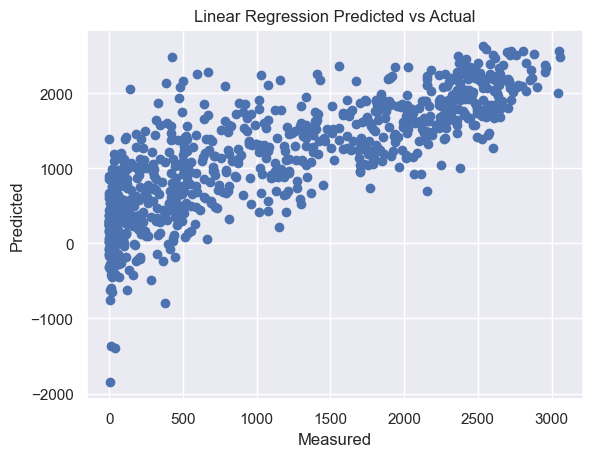

In [10]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lin_pred = regr.predict(X_test)

linear_regression_score = regr.score(X_test, y_test)
print(linear_regression_score)

from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

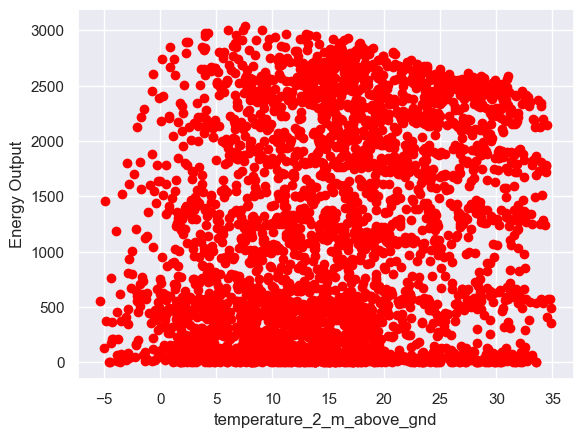

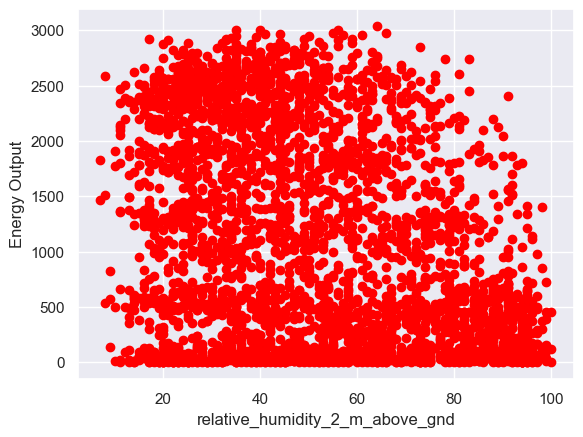

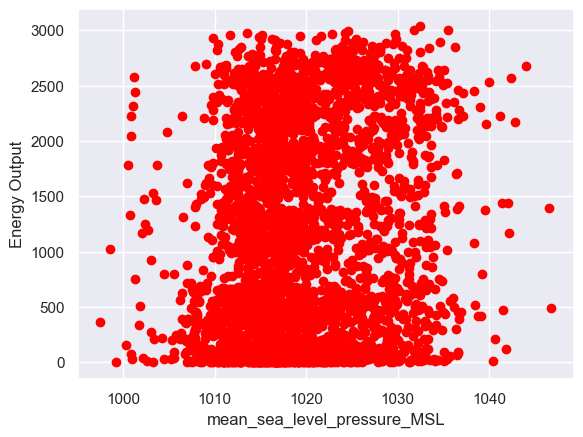

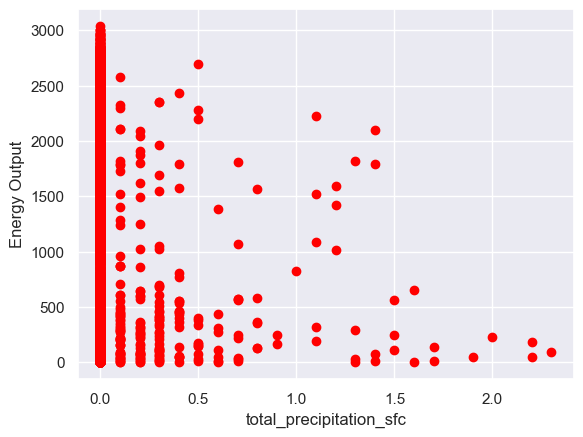

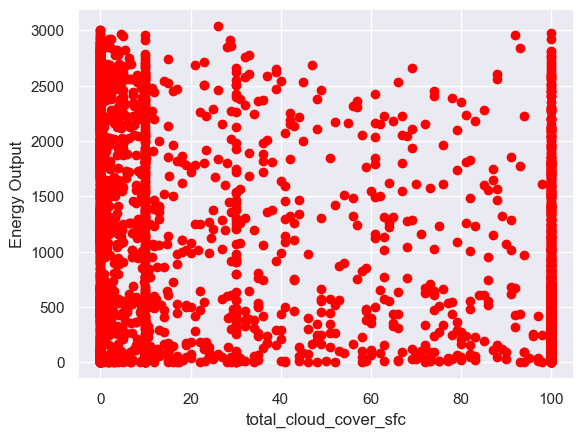

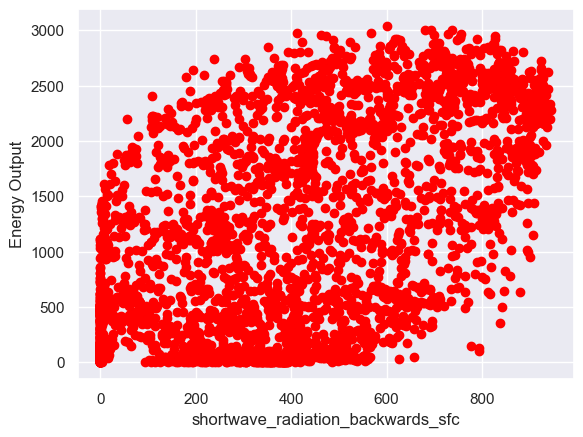

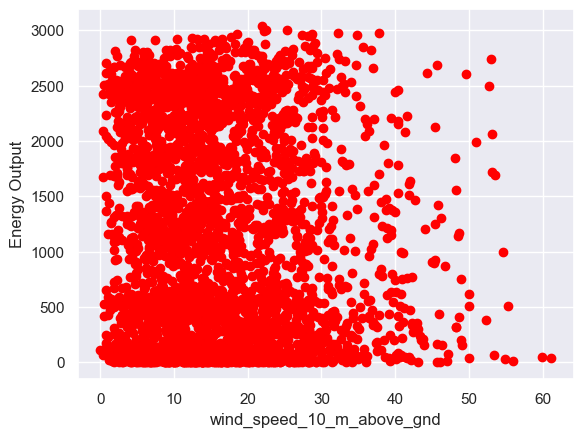

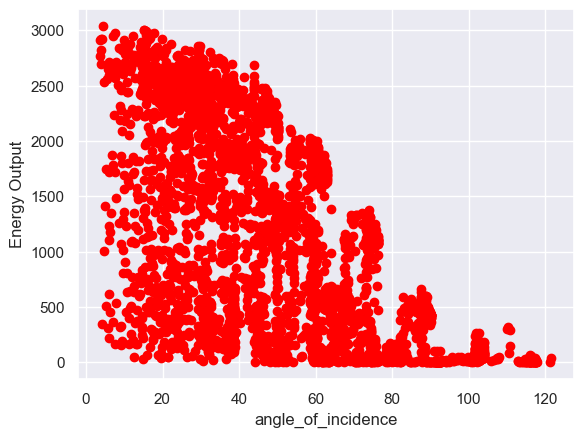

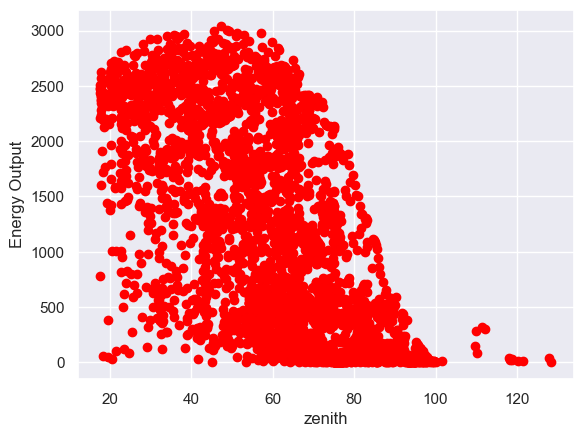

In [11]:
for i in ("temperature_2_m_above_gnd", "relative_humidity_2_m_above_gnd", "mean_sea_level_pressure_MSL", 
        "total_precipitation_sfc",  "total_cloud_cover_sfc", "shortwave_radiation_backwards_sfc",
        "wind_speed_10_m_above_gnd", "angle_of_incidence",
       "zenith"):
    plt.scatter(X_train[[i]], y_train, color='red')
    plt.xlabel(i)
    plt.ylabel('Energy Output')
    plt.show()

C:\Users\pawan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6907723664475625
Root mean squared error: 531.48
Mean absolute error: 400.94
R-squared: 0.69


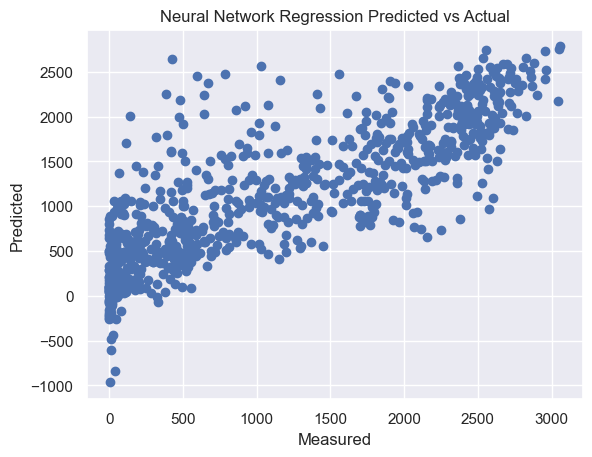

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

# Train the model using the training sets
mlp.fit(X_train, y_train.values.ravel())

# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
print(neural_network_regression_score)

# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

0.7947668308052224
Root mean squared error: 432.98
Mean absolute error: 280.45
R-squared: 0.79
Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'total_cloud_cover_sfc', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'angle_of_incidence', 'zenith'],
      dtype='object')


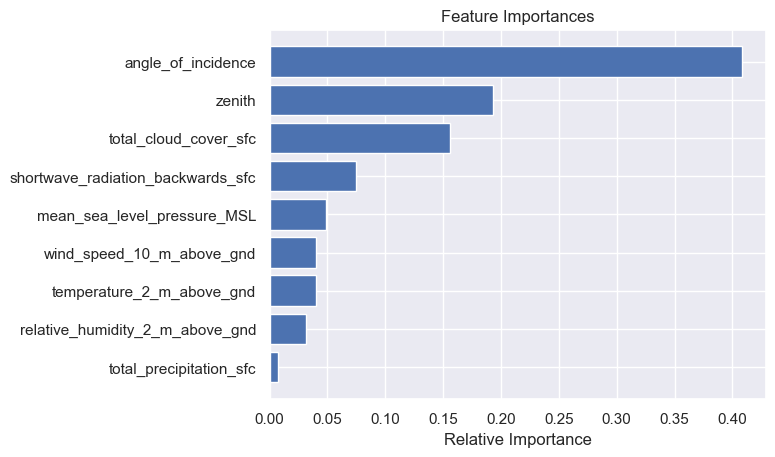

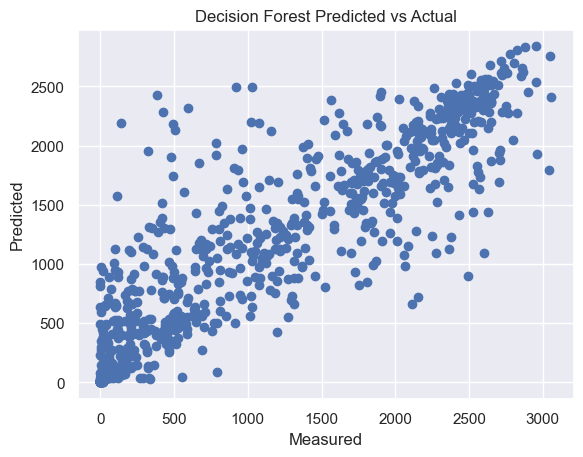

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=0)

# Train the model using the training sets
regr_rf.fit(X_train, y_train.values.ravel())

# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
print(decision_forest_score)

# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

print(X.columns)

features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

0.652264581964497
Root mean squared error: 563.60


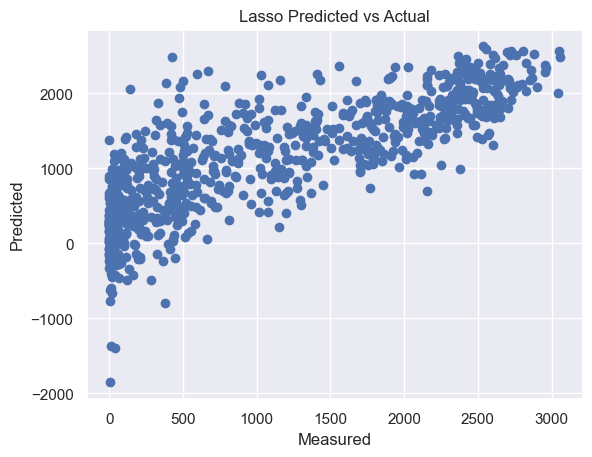

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

# Score the model
lasso_score = lasso.score(X_test, y_test)
print(lasso_score)

# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [15]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("Random Forest score: ", decision_forest_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("Random Forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))

Scores:
Linear regression score:  0.6524695441369588
Neural network regression score:  0.6907723664475625
Lasso regression score:  0.652264581964497
Random Forest score:  0.7947668308052224


RMSE:
Linear regression RMSE: 563.43
Neural network RMSE: 531.48
Lasso RMSE: 563.60
Random Forest RMSE: 432.98
